In [1]:
import cv2 
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
import re
from pdf2image import convert_from_path

In [42]:
images = convert_from_path('cambridge_physics_igcse_-_part-1.pdf',dpi=120)

for i in range(len(images)):
    # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

In [23]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [58]:
img = cv2.imread('images/page2.jpg')
img =get_grayscale(img)

In [59]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

"REVISED SYLLABUS\n|\nO LEVEL PHYSICS 5054 ~\n\nAll candidates enter for three papers - Papers 1 and 2 and either Paper 3 or 4. s\n\nRecaro es\n\n40 compulsory multiple choice questions of the direct choice type. The questions involve four response\n\nitems.\n\n40 marks\n\neee alee eeu\n\nThis paper has two sections.\n\nSection A has a small number of compulsory, structured questions of variable mark value. 45 marks in\n\ntotal are available for this section.\n\nSection B has three questions. Each question is worth 16 marks. Candidates must answer two.questions\n\nfrom this section. ‘\n\nThere is no compulsory question on Section 25 of the syllabus (Electronics systems). Questions set on\n\ni topics within Section 25 appear only in Paper 2 and are always set as an alternative within a question.\n| 75 marks\nean kas PEM eect eek od eco\n|\n\nThis paper has two sections. ‘Avwritten paper of compulsory short-answer and |\n\nstructured questions designed to test famillarty\n\nSection A has

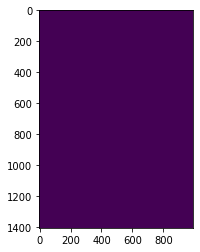

In [53]:
plt.imshow(img)